In [40]:
# IMPORTS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

%matplotlib notebook

In [41]:
# READ DATA: Blade landings 

blade_landings= pd.read_csv('blade_landing_helihoist_sbitroot.txt')

# make epoch index of dataframe and convert epoch into readable dates
blade_landings.epoch_land= blade_landings.epoch_land.apply(lambda x: pd.to_datetime(x, unit= 's', utc=True))

# convert blade landings of turbine 8 into readable dates
blade_landing1= pd.to_datetime(1.571127e+09	, unit='s', utc=True)
blade_landing2= pd.to_datetime(1.571154e+09, unit='s', utc=True)
blade_landing3= pd.to_datetime(1.571188e+09, unit='s', utc=True)

In [42]:
print(blade_landing1)
print(blade_landing2)
print(blade_landing3)
#print(landings)

2019-10-15 08:10:00+00:00
2019-10-15 15:40:00+00:00
2019-10-16 01:06:40+00:00


In [43]:
# FIND FILE 

blade_landing = pd.to_datetime('2019-10-15 07:41', utc=True)

files = glob('turbine-08_sbitroot_tom_acc-vel-pos_2019-10-1*.csv')

for f in files:
    
    f_start = pd.to_datetime(f.split('_')[4], utc=True, format='%Y-%m-%d-%H-%M-%S')
    f_end = pd.to_datetime(f.split('_')[5].split('.')[0], utc=True, format='%Y-%m-%d-%H-%M-%S')
    
    if f_start < blade_landing and f_end > blade_landing:
        print(f'found file: {f}: {f_start}, {f_end}')

found file: turbine-08_sbitroot_tom_acc-vel-pos_2019-10-15-07-40-56_2019-10-15-08-08-20.csv: 2019-10-15 07:40:56+00:00, 2019-10-15 08:08:20+00:00


# SBIT

In [72]:
# READ DATA SBIT

# Blade installation period: landing time
landing1_tb8= pd.read_csv('turbine-08_sbitroot_tom_acc-vel-pos_2019-10-15-08-08-20_2019-10-15-08-36-04.csv')
landing1_tb8.epoch= pd.to_datetime(landing1_tb8.epoch, unit= 's', utc=True)
landing1_tb8.set_index('epoch', inplace=True)

# Blade installation: impact event
imp1_tb8= pd.read_csv('turbine-08_sbitroot_tom_acc-vel-pos_2019-10-15-07-40-56_2019-10-15-08-08-20.csv')
imp1_tb8.epoch= pd.to_datetime(imp1_tb8.epoch, unit= 's', utc=True)
imp1_tb8.set_index('epoch', inplace=True)

# Blade installation period: before landing
inst1_tb8= pd.read_csv('turbine-08_sbitroot_tom_acc-vel-pos_2019-10-15-07-13-34_2019-10-15-07-40-56.csv')
inst1_tb8.epoch= pd.to_datetime(inst1_tb8.epoch, unit= 's', utc=True)
inst1_tb8.set_index('epoch', inplace=True)


<IPython.core.display.Javascript object>


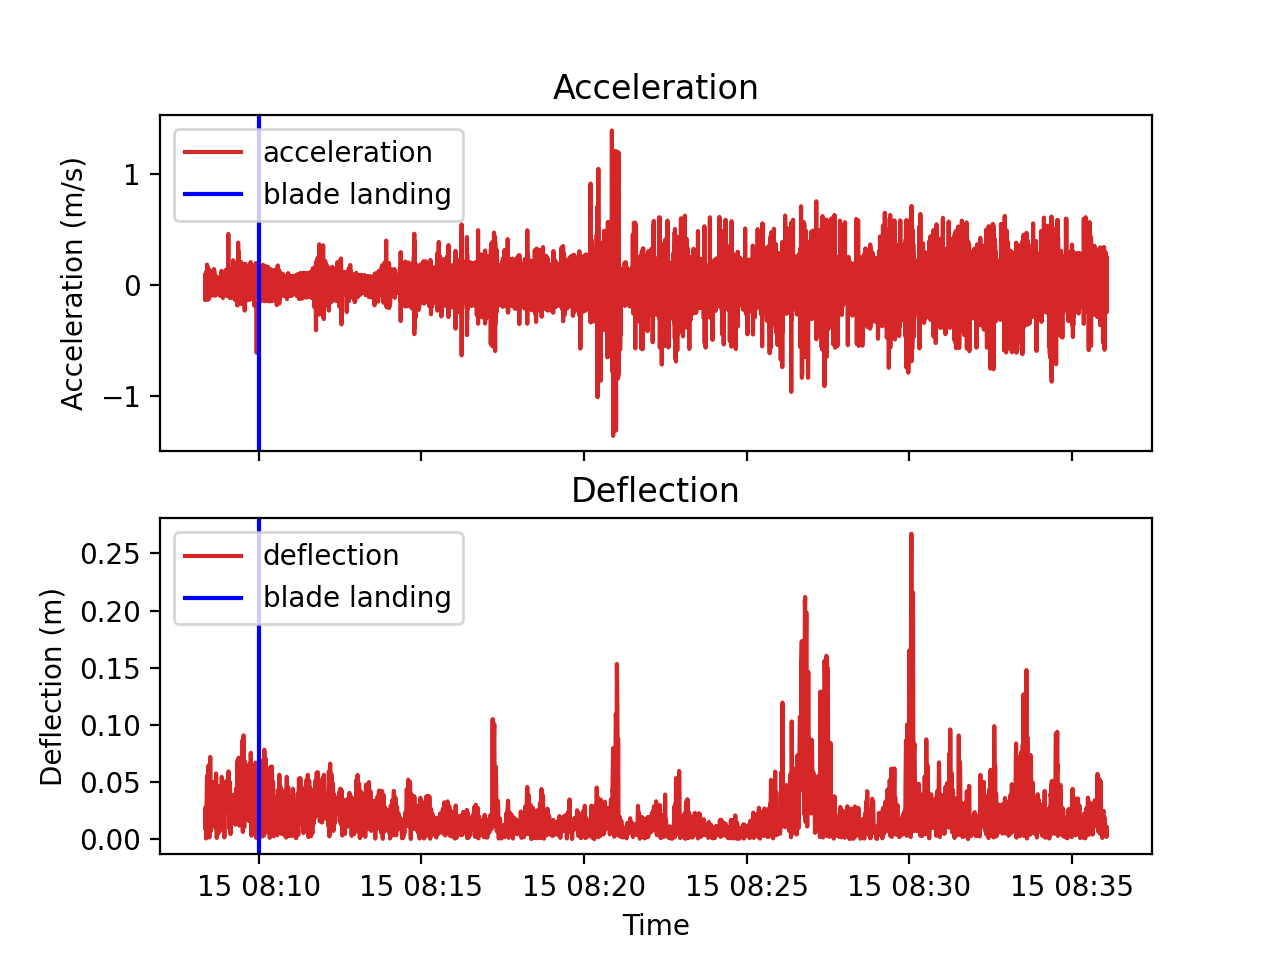

In [58]:
# PLOT BLADE LANDING 3:

fig, axs = plt.subplots(2, sharex=True)
#fig.suptitle('Turbine 08: Blade landing 3')

axs[0].plot(landing1_tb8.acc_x, 'tab:red', label= 'acceleration')
axs[0].set_title("Acceleration")
axs[0].set(ylabel='Acceleration (m/s)')
axs[0].axvline(x=blade_landing1, color='b', label= 'blade landing')
axs[0].legend(loc="upper left")

axs[1].plot(landing1_tb8.deflection, 'tab:red', label='deflection')
axs[1].set_title("Deflection")
axs[1].set(ylabel='Deflection (m)')
axs[1].axvline(x=blade_landing1, color='b', label= 'blade landing')
axs[1].legend(loc="upper left")

plt.xlabel('Time')
plt.savefig('tb8_b1_deflection_acceleration', dpi=300)

<IPython.core.display.Javascript object>


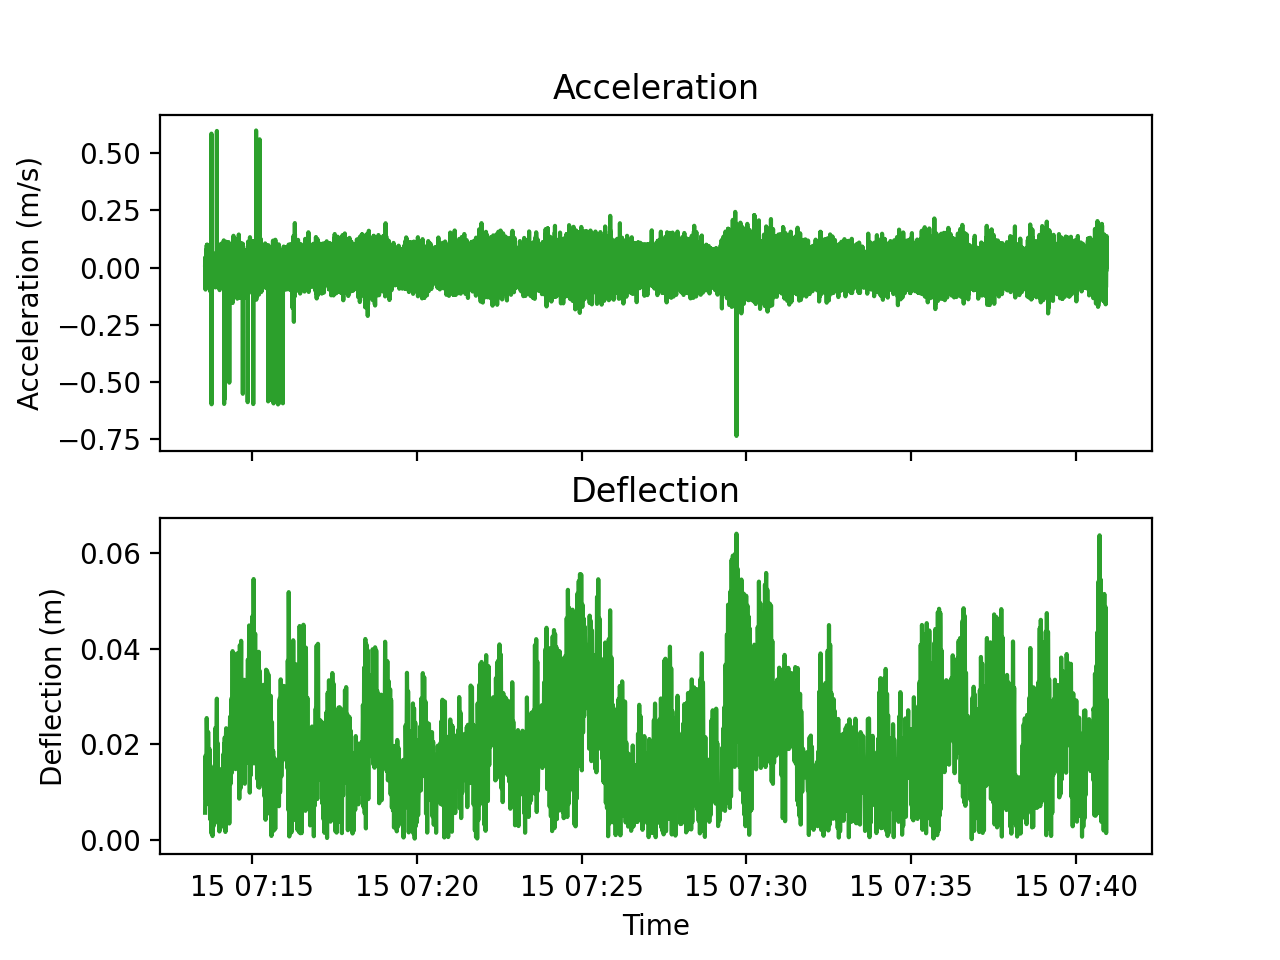

In [73]:
# PLOT BLADE INSTALLATION 1 WITHOUT LANDING:

fig, axs = plt.subplots(2, sharex=True)
#fig.suptitle('Turbine 08: Blade installation process without landing')

axs[0].plot(inst1_tb8.acc_x, 'tab:green')
axs[0].set_title("Acceleration")
axs[0].set(ylabel='Acceleration (m/s)')

axs[1].plot(inst1_tb8.deflection, 'tab:green')
axs[1].set_title("Deflection")
axs[1].set(ylabel='Deflection (m)')

plt.xlabel('Time')
plt.savefig('tb8_nolanding_deflection_acceleration', dpi=300)

<IPython.core.display.Javascript object>


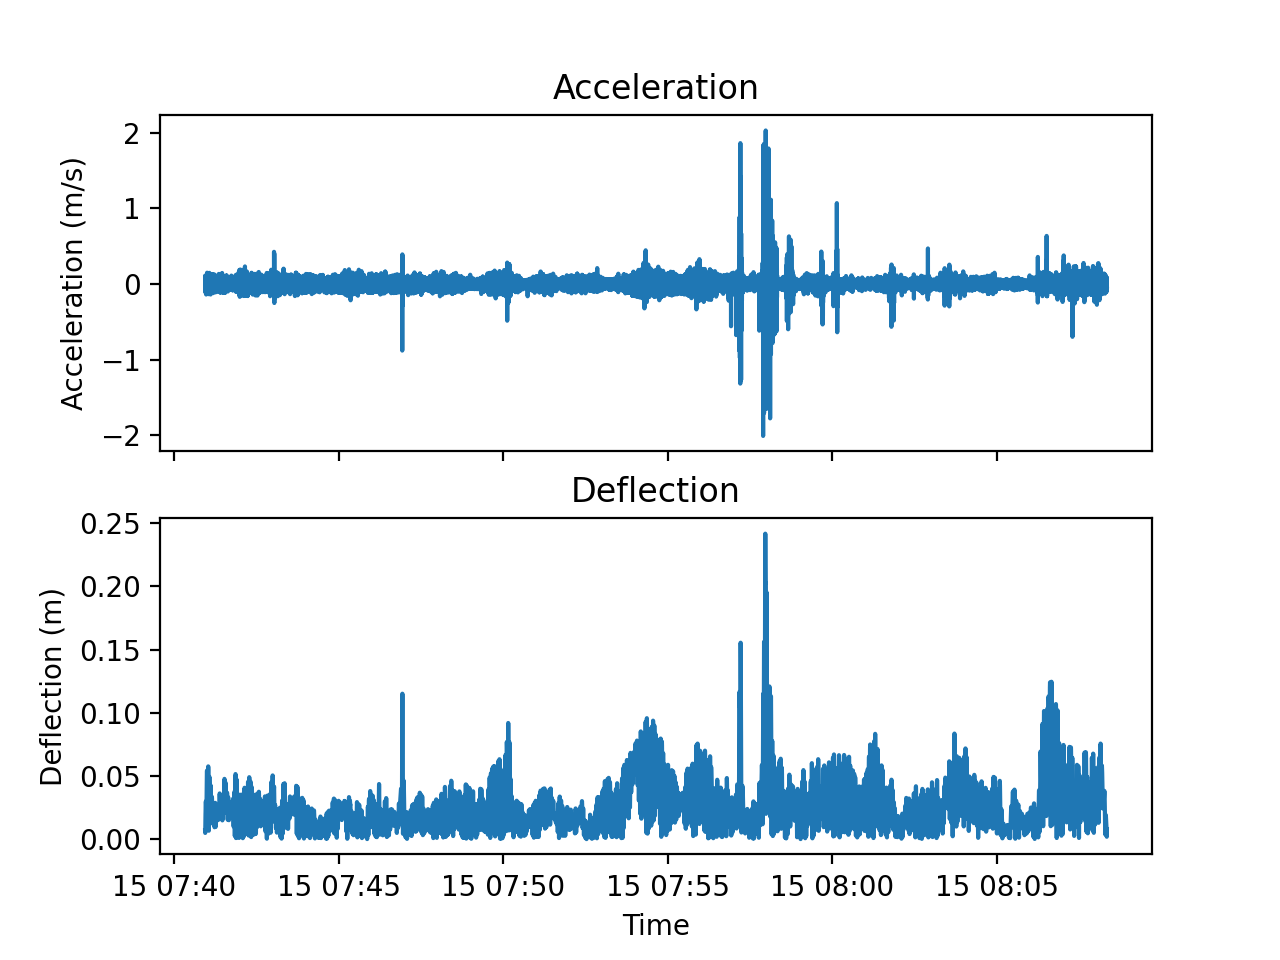

In [60]:
# PLOT IMPACT EVENT:

fig, axs = plt.subplots(2, sharex=True)
#fig.suptitle('Turbine 08: Impact event')
axs[0].plot(imp1_tb8.acc_x, 'tab:blue')
axs[0].set_title("Acceleration")
axs[1].plot(imp1_tb8.deflection, 'tab:blue')

axs[1].set_title("Deflection")
plt.xlabel('Time')
axs[0].set(ylabel='Acceleration (m/s)')
axs[1].set(ylabel='Deflection (m)')

plt.savefig('tb8_impact_deflection_acceleration', dpi=300)

# Tower

In [75]:
# READ DATA TOWER

# Blade installation period: landing time
tower_landing1_tb8= pd.read_csv('turbine-08_helihoist-1_tom_acc-vel-pos_2019-10-15-07-57-08_2019-10-15-08-23-52.csv')
tower_landing1_tb8.epoch= pd.to_datetime(tower_landing1_tb8.epoch, unit= 's', utc=True)
tower_landing1_tb8.set_index('epoch', inplace=True)

# Blade installation period: impact event
tower_impact_tb8= pd.read_csv('turbine-08_helihoist-1_tom_acc-vel-pos_2019-10-15-07-30-26_2019-10-15-07-57-08.csv')
tower_impact_tb8.epoch= pd.to_datetime(tower_impact_tb8.epoch, unit= 's', utc=True)
tower_impact_tb8.set_index('epoch', inplace=True)

# Blade installation period: before landing
tower_tb8= pd.read_csv('turbine-08_helihoist-1_tom_acc-vel-pos_2019-10-15-07-03-49_2019-10-15-07-30-26.csv')
tower_tb8.epoch= pd.to_datetime(tower_tb8.epoch, unit= 's', utc=True)
tower_tb8.set_index('epoch', inplace=True)

<IPython.core.display.Javascript object>


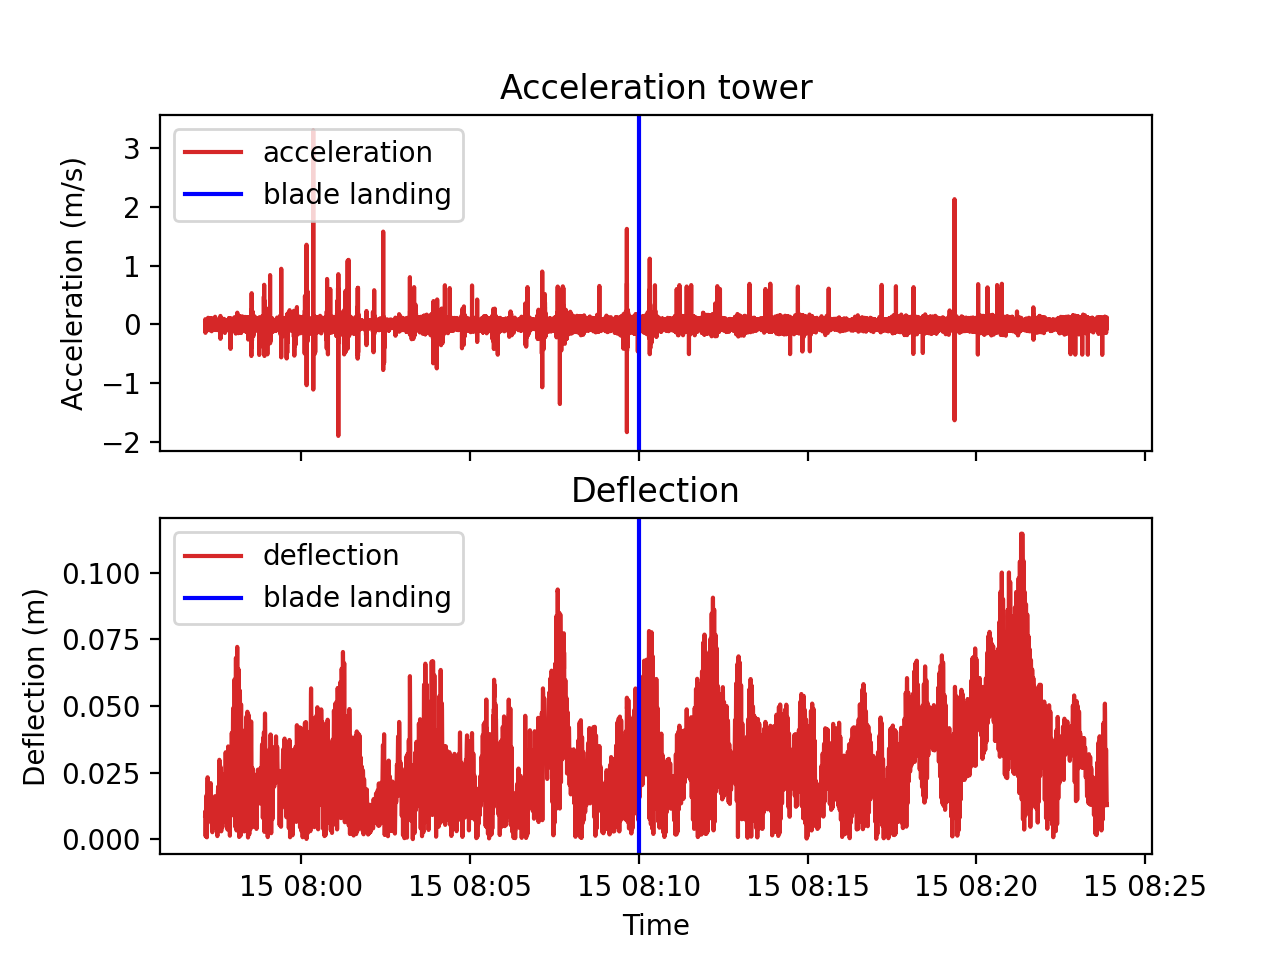

In [76]:
# PLOT BLADE LANDING 1 TOWER:

fig, axs = plt.subplots(2, sharex=True)
#fig.suptitle('Turbine 08: Blade landing 3')

axs[0].plot(tower_landing1_tb8.acc_x, 'tab:red', label= 'acceleration')
axs[0].set_title("Acceleration tower")
axs[0].set(ylabel='Acceleration (m/s)')
axs[0].axvline(x=blade_landing1, color='b', label= 'blade landing')
axs[0].legend(loc="upper left")

axs[1].plot(tower_landing1_tb8.deflection, 'tab:red', label='deflection')
axs[1].set_title("Deflection")
axs[1].set(ylabel='Deflection (m)')
axs[1].axvline(x=blade_landing1, color='b', label= 'blade landing')
axs[1].legend(loc="upper left")

plt.xlabel('Time')
plt.savefig('tb8_tower_acceleration_b1', dpi=300)

<IPython.core.display.Javascript object>


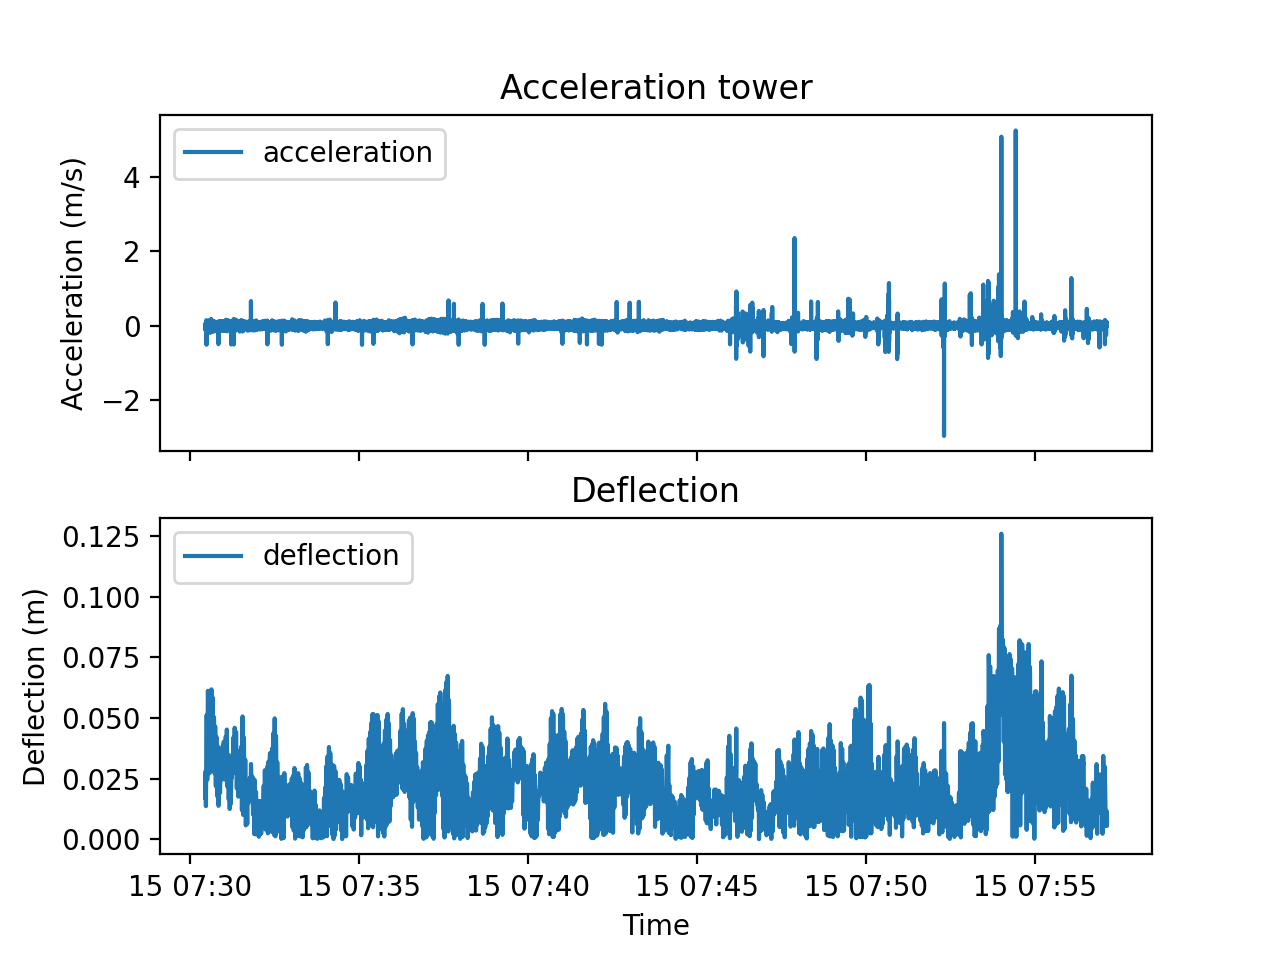

In [77]:
# PLOT IMPACT EVENT TOWER:

fig, axs = plt.subplots(2, sharex=True)
#fig.suptitle('Turbine 08: Blade landing 3')

axs[0].plot(tower_impact_tb8.acc_x, 'tab:blue', label= 'acceleration')
axs[0].set_title("Acceleration tower")
axs[0].set(ylabel='Acceleration (m/s)')
axs[0].legend(loc="upper left")

axs[1].plot(tower_impact_tb8.deflection, 'tab:blue', label='deflection')
axs[1].set_title("Deflection")
axs[1].set(ylabel='Deflection (m)')
axs[1].legend(loc="upper left")

plt.xlabel('Time')
plt.savefig('tb8_tower_impact', dpi=300)

<IPython.core.display.Javascript object>


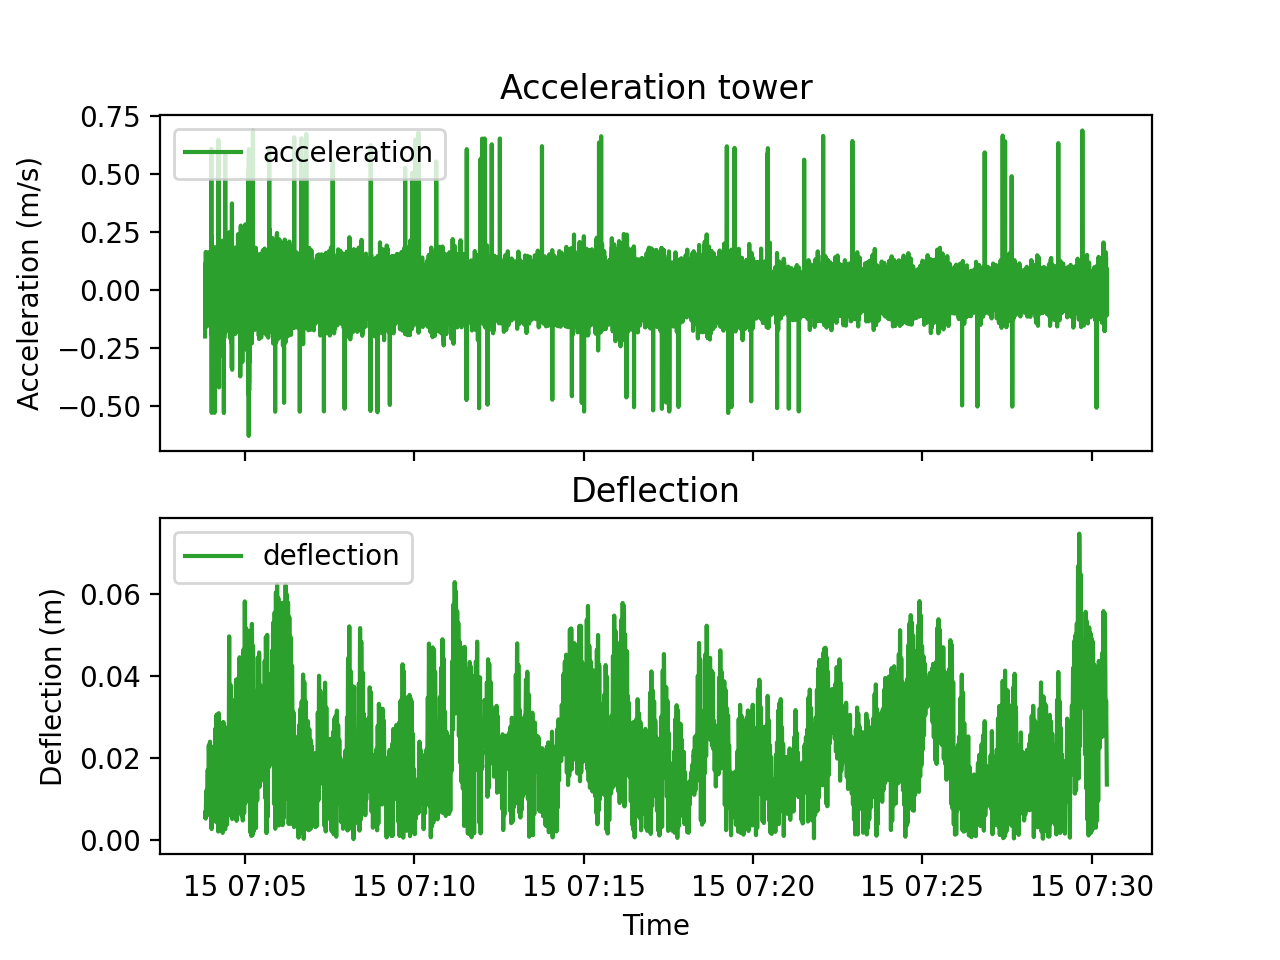

In [78]:
# PLOT NO LANDING TOWER:

fig, axs = plt.subplots(2, sharex=True)
#fig.suptitle('Turbine 08: Blade landing 3')

axs[0].plot(tower_tb8.acc_x, 'tab:green', label= 'acceleration')
axs[0].set_title("Acceleration tower")
axs[0].set(ylabel='Acceleration (m/s)')
axs[0].legend(loc="upper left")

axs[1].plot(tower_tb8.deflection, 'tab:green', label='deflection')
axs[1].set_title("Deflection")
axs[1].set(ylabel='Deflection (m)')
axs[1].legend(loc="upper left")

plt.xlabel('Time')
plt.savefig('tb8_tower_beforelanding', dpi=300)